In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import svm
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer


import nltk
from nltk.tokenize import word_tokenize

In [2]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/mohammed/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/mohammed/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
from sklearn.feature_extraction.text import CountVectorizer

In [71]:
def load_data(data_label):
    """Return a DataFrame with two columns, named 'text'
    and 'target'. Column 'sentiment', an integer between 0 and 5,
    is a numerical representation of the sentiment in Column 'text'.
    
    params:
    ----------------------
        data_label: "tweets" or "movies".
            We can add other datasets if needed.
    """
    
    
    if data_label == "tweets":
        return pd.read_csv('../datasets/200-thousand-tweets.csv',
                           encoding='latin-1',
                           header = None,
                           usecols=[0, 5],
                           names=["sentiment", "text"])
    elif data_label == "movies":
        return pd.read_csv('../datasets/8.5-thousand-reviews.tsv',
                           sep='\t',
                           header = None,
                           usecols=[0, 1],
                           names=["sentiment", "text"])
     
    raise ValueError("Invalid `data_label` used. Currently supported options are "
        "\"tweets\" and \"movies\".")
        
full_data = load_data("tweets")

In [248]:
training_count = 50000
test_count = 1000
total_count = training_count + test_count

# How many numerical features to construct out of a given text.
# The mathematical modelling will be based on these numerical features,
# rather than the text itself.
features_count = 1000

# Random sample
data = full_data.sample(n=total_count, random_state=100).reset_index(drop=True)

In [249]:
def clean_text(text):
    """
    Return clean text
    params
    ------------
        text: string
    """

    text = text.lower() # Lowercase
    tokens = word_tokenize(text)
    tokens = [t for t in tokens if not t in stopwords] # Remove stopwords
    tokens = [t for t in tokens if t.isalnum()] # Remove punctuation
    text_clean = " ".join(tokens)
    
    return text_clean

# Clean text 
data['text'] = [clean_text(text) for text in data['text']]

In [250]:
data.head()

,sentiment,text
0,4,brookemcculloch yay brooke cool
1,0,iamdiddy u sound like b4 hit hrs sadly today o...
2,0,patriciiaaa answering xd hate want love sweat
3,0,wire isnt week
4,0,got fryred follower related scaler fire ami


In [251]:
# Train test split
train = data[:training_count]
test = data[training_count:total_count].reset_index(drop=True)

# Create count vectoriser 
vectorizer = CountVectorizer(ngram_range=(1, 2),
                             max_features=features_count)

# Transform training corpus into feature matrix
X = vectorizer.fit_transform(train["text"])
feature_names = vectorizer.get_feature_names()

x_train = pd.DataFrame(data=X.toarray(), columns=feature_names)
y_train = train["sentiment"]

In [252]:
# Transform testing corpus into feature matrix
X = vectorizer.transform(test['text'])

x_test = pd.DataFrame(data=X.toarray(),columns=feature_names)
y_test = test['sentiment']

In [253]:
# Min-Max scalling
x_max = x_train.max()
x_min = x_train.min()

x_train = (x_train-x_min) / x_max
x_test = (x_test-x_min) / x_max

In [254]:
# Fit SVM
start_timer()
model = svm.SVC(kernel='linear', C=1).fit(x_train, y_train)
stop_timer()

# Get predictions on test set
y_pred = model.predict(x_test)

# Accuracy on test set
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy: {}".format(accuracy))

Accuracy: 0.725


Text(0.5, 61.5, 'Predicted')

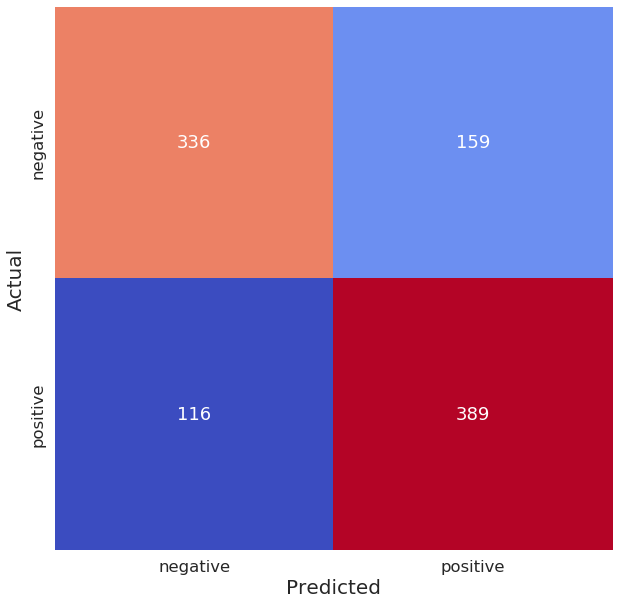

In [255]:
# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data=conf_matrix,
                           columns=['negative', 'positive'],
                           index=['negative', 'positive'])

# Plot confusion matrix
plt.figure(figsize=(10, 10), facecolor='w', edgecolor='k')
sns.set(font_scale=1.5)
sns.heatmap(conf_matrix, cmap='coolwarm', annot=True, fmt='.5g', cbar=False)
plt.ylabel('Actual', size=20)
plt.xlabel('Predicted', size=20)

In [167]:
import time
x1s = []
x2s = []
dts = []

def reset():
    global x1s, x2s, dts
    x1s = []
    x2s = []
    dts = []
    
def start_timer():
    global t1
    t1 = time.perf_counter()
def stop_timer():
    dt = time.perf_counter() - t1
    x1s.append(training_count)
    x2s.append(features_count)
    dts.append(dt)

In [215]:
reset()

In [246]:
print(x1s)
print(dts)

[2000, 2500, 3000]
[2.770286204991862, 4.120672842953354, 6.153533114003949]


LinregressResult(slope=1.9613436293850322, intercept=-13.901622977667438, rvalue=0.9981452404064465, pvalue=0.03877984622985299, stderr=0.1196237157812048)

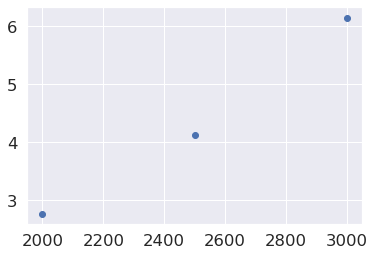

In [245]:
from scipy import stats 
plt.scatter(x1s, dts)
stats.linregress(np.log(x1s), np.log(dts))

In [273]:
model.coef_

array([[-3.22259728e-01,  2.20575715e-01,  5.10694396e-01,
         1.13420963e-01,  1.54808154e-01,  4.51517046e-01,
        -3.35146883e-01, -1.70338896e-01, -9.44902799e-01,
        -5.11489345e-01,  4.98938552e-01, -1.63156086e-04,
         5.90808978e-01,  5.28497407e-01,  0.00000000e+00,
        -1.95188171e-01,  3.52757042e-01,  4.71193015e-01,
         5.69575189e-01, -3.47667657e-01, -3.94103291e-01,
        -8.41483600e-01,  1.79627179e-01, -6.57426426e-01,
         9.94391231e-01, -8.64226836e-01, -1.99656765e+00,
         4.53693092e-02,  4.25374004e-01, -5.05230032e-01,
         7.05713793e-01,  3.97477755e-01, -3.60291954e-01,
        -2.82097602e-02,  1.24242243e+00,  5.92240862e-01,
        -8.62429946e-01, -7.71402090e-01,  7.25257910e-01,
        -6.09513244e-01, -2.82448877e+00, -1.37873781e-01,
        -1.80203857e-01,  2.56988833e-01, -5.82271146e-01,
        -1.31069287e+00,  4.14988683e-01, -1.01922449e-02,
         5.20036440e-01, -9.13202668e-01,  3.82607885e-0